In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge 
import pickle

In [2]:
df = pd.read_csv("D:\dissertation\housing2\Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
x =df.iloc[:,1:-8]
x.head(15)

,area,bedrooms,bathrooms,stories
0,7420,4,2,3
1,8960,4,4,4
2,9960,3,2,2
3,7500,4,2,2
4,7420,4,1,2
5,7500,3,3,1
6,8580,4,3,4
7,16200,5,3,2
8,8100,4,1,2
9,5750,3,2,4


In [5]:
y=df.iloc[:,[-13]]
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [6]:
x_train,x_val,y_train,y_val = train_test_split(x, y, test_size = 0.25, random_state=7)
print(x_train.shape, x_val.shape)

(408, 4) (137, 4)


In [7]:
y_train, y_val = y_train.to_numpy(), y_val.to_numpy()

In [8]:
y_train.shape

(408, 1)

# Adding Polynomial Features

In [9]:
degree = 10
poly = PolynomialFeatures(degree)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
print(x_train_poly.shape)

(408, 1001)


# Feature Scaling

In [10]:
sc = StandardScaler()
sc.fit(x_train_poly)
x_train_scaled = sc.transform(x_train_poly)
x_val_scaled = sc.transform(x_val_poly)

In [11]:
x_train_scaled[:5]

array([[ 0.        ,  1.14018601,  1.40796781, ...,  2.86513087,
         3.48116221,  3.42217278],
       [ 0.        , -0.79321861,  0.02040533, ..., -0.25059542,
        -0.29247456, -0.30827689],
       [ 0.        , -0.54183031,  0.02040533, ..., -0.25059542,
        -0.29247456, -0.30827689],
       [ 0.        , -0.10304344, -1.36715715, ..., -0.2536292 ,
        -0.29615615, -0.31191991],
       [ 0.        , -0.13046762, -1.36715715, ..., -0.25059542,
        -0.29247456, -0.30827689]])

# Training

In [12]:
model = Ridge(alpha=10)
model.fit(x_train_scaled,y_train)

Ridge(alpha=10)

In [13]:
train_score = model.score(x_train_scaled,y_train)
print("Train score: ", train_score)

Train score:  0.6586396237816017


In [14]:
val_score = model.score(x_val_scaled,y_val)
print("Val Score: ",val_score)

Val Score:  0.4432089073826281


# HyperParameter Tuning

In [15]:
params={}
params['degrees']=[1,2,3,4,5,6,7,8,9,10]
params['alpha']=[7,8,9,10]

In [16]:
def fit(x_train_scaled,y_train,x_val_scaled,y_val,degree,alpha,grid_search=False,exp_name=None):
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train)
    x_val_poly = poly.transform(x_val)

    sc = StandardScaler()
    sc.fit(x_train_poly)
    x_train_scaled = sc.transform(x_train_poly)
    x_val_scaled = sc.transform(x_val_poly)

    model = Ridge(alpha)
    model.fit(x_train_scaled,y_train)

    train_score = model.score(x_train_scaled,y_train)
    val_score = model.score(x_val_scaled,y_val)
 
    if grid_search:
        scores = [exp_name, degree, alpha, train_score, val_score]
        return scores
    else:
        print('Train Score: ',train_score)
        print('Val Score: ',val_score)
        return model,poly,sc

In [17]:
from tqdm.notebook import tqdm

In [18]:
result=[]
exp_id = 1
for i in tqdm(range(len(params['degrees']))):
    degree = params['degrees'][i]
    for j in range(len(params['alpha'])):
        alpha = params['alpha'][j]
        exp_name='exp '+str(exp_id)
        exp_id+=1
        result.append(fit(x_train_scaled,y_train,x_val_scaled,y_val,degree,alpha,grid_search=True,exp_name=exp_name))
result

  0%|          | 0/10 [00:00<?, ?it/s]

[['exp 1', 1, 7, 0.5665048338468782, 0.4617103098879789],
 ['exp 2', 1, 8, 0.5664791136595422, 0.4615127446278561],
 ['exp 3', 1, 9, 0.5664501564627589, 0.46131395048586943],
 ['exp 4', 1, 10, 0.5664180053603367, 0.4611139475647744],
 ['exp 5', 2, 7, 0.5991325211772731, 0.4678175062293861],
 ['exp 6', 2, 8, 0.5979757880170322, 0.4678040347221726],
 ['exp 7', 2, 9, 0.5968578739624977, 0.46772195283413787],
 ['exp 8', 2, 10, 0.5957817568733816, 0.4675894038561893],
 ['exp 9', 3, 7, 0.611012014297349, 0.46143249811148557],
 ['exp 10', 3, 8, 0.6102449521733855, 0.4618553747524119],
 ['exp 11', 3, 9, 0.6095559566301035, 0.4621984236624225],
 ['exp 12', 3, 10, 0.6089226821456842, 0.4624784313542252],
 ['exp 13', 4, 7, 0.6208221773633507, 0.4531381295530217],
 ['exp 14', 4, 8, 0.6196105029615836, 0.45391336528611514],
 ['exp 15', 4, 9, 0.6185732328597748, 0.4545802248039911],
 ['exp 16', 4, 10, 0.6176688760613298, 0.455159350189546],
 ['exp 17', 5, 7, 0.6316258728090527, 0.445104593024612],
 

In [19]:
result_df=pd.DataFrame(result,columns=['Experiment_id','Degree','Alpha','Train Score','Val Score'])
result_df

,Experiment_id,Degree,Alpha,Train Score,Val Score
0,exp 1,1,7,0.566505,0.461710
1,exp 2,1,8,0.566479,0.461513
2,exp 3,1,9,0.566450,0.461314
3,exp 4,1,10,0.566418,0.461114
4,exp 5,2,7,0.599133,0.467818
5,exp 6,2,8,0.597976,0.467804
6,exp 7,2,9,0.596858,0.467722
7,exp 8,2,10,0.595782,0.467589
8,exp 9,3,7,0.611012,0.461432
9,exp 10,3,8,0.610245,0.461855


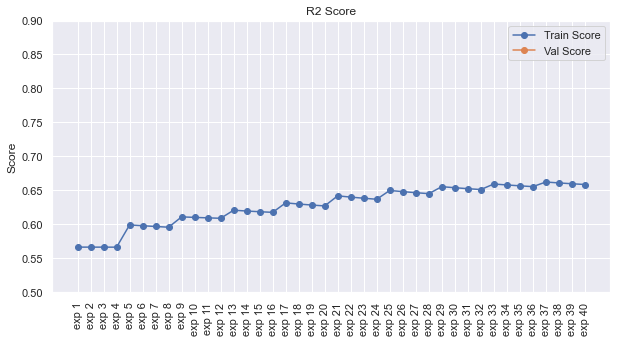

In [20]:
plt.figure(figsize=(10,5))
plt.title("R2 Score")
plt.plot(result_df['Train Score'],marker='o',label = 'Train Score')
plt.plot(result_df['Val Score'],marker='o', label = 'Val Score')
plt.xticks(list(range(len(result_df))),result_df['Experiment_id'],rotation=90)
plt.ylabel('Score')
plt.ylim((0.5,0.9))
plt.legend()
plt.show()

In [21]:
result_df.sort_values(by='Val Score', ascending=False)

,Experiment_id,Degree,Alpha,Train Score,Val Score
4,exp 5,2,7,0.599133,0.467818
5,exp 6,2,8,0.597976,0.467804
6,exp 7,2,9,0.596858,0.467722
7,exp 8,2,10,0.595782,0.467589
11,exp 12,3,10,0.608923,0.462478
10,exp 11,3,9,0.609556,0.462198
9,exp 10,3,8,0.610245,0.461855
0,exp 1,1,7,0.566505,0.461710
1,exp 2,1,8,0.566479,0.461513
8,exp 9,3,7,0.611012,0.461432


In [22]:
result_df.loc[result_df['Experiment_id'] == 'exp 5']

,Experiment_id,Degree,Alpha,Train Score,Val Score
4,exp 5,2,7,0.599133,0.467818


# Training the model on selected hyperparameters

In [23]:
best_model,poly,sc = fit(x_train_scaled,y_train,x_val_scaled,y_val,degree=2,alpha=7)

Train Score:  0.5991325211772731
Val Score:  0.4678175062293861


# Saving and loading the model

In [24]:
from pickle import dump

In [25]:
dump(best_model,open('best_model.pkl', 'wb'))
dump(poly, open('poly.pkl', 'wb'))
dump(sc, open('scalar.pkl', 'wb'))

In [26]:
from pickle import load

In [27]:
loaded_model = load(open('best_model.pkl', 'rb'))
poly =load(open('poly.pkl', 'rb'))
sc = load(open('scalar.pkl', 'rb'))

### Deploying

In [28]:
def prediction(model,poly,sc):
    namelist = [2]
    namelist.append(float(input('Enter sq area of house: ')))
    namelist.append(float(input('Enter number of bedrooms: ')))
    namelist.append(float(input('Enter number of bathrooms: ')))
    namelist.append(float(input('Enter number of stories: ')))
    array = np.asarray([-1, 1])
    arrary = array.reshape(-1, 1)
    array = poly.transform(array)
    scaled_arr = sc.transform(array)
    print('Price of the house is estimated to be', round(model.predict(scaled_arr)[0][0],2))

In [29]:
prediction(loaded_model,poly,sc)

Enter sq area of house: 16200	
Enter number of bedrooms: 5	
Enter number of bathrooms: 4
Enter number of stories: 2


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[-1.  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.